## `Problem Statement`

* Predict Loan Eligibility for **Dream Housing Finance company**,Dream Housing Finance company deals in all kinds of **home loans**.They have presence across all **urban, semi urban and rural areas**. **Customer first applies for home loan and after that company validates the customer eligibility for loan**.

* **Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form**. **These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others**.To automate this process, they have provided a dataset to identify the customers segments that **are eligible for loan amount so that they can specifically target these customers**. 

### `Data Dictionary`

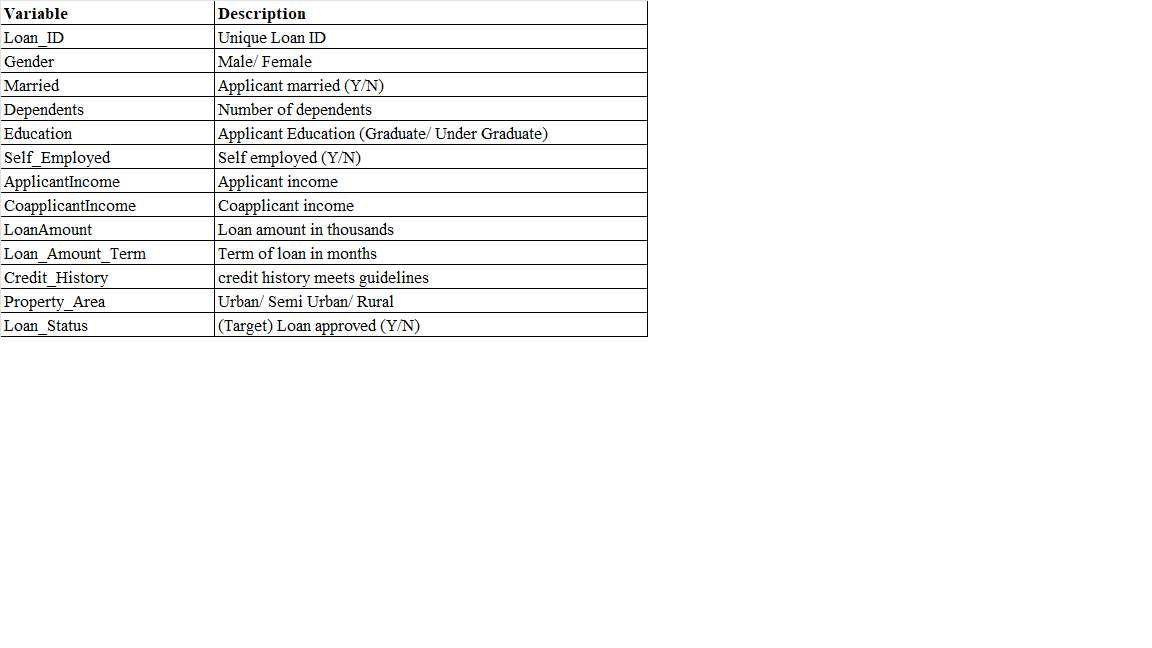

* **Target Variable**: **Loan_Status(Y-Yes/N-No)**

**Submission file format**

* Variable-------- Description
* Loan_ID--------   Unique Loan ID
* Loan_Status------	(Target) Loan approved (Y/N)

##### Evaluation Metric:-

* Your model performance will be evaluated on the basis of your prediction of loan status for the test data (test.csv), which contains similar data-points as train except for the loan status to be predicted. Your submission needs to be in the format as shown in sample submission.

* We at our end, have the actual loan status for the test dataset, against which your predictions will be evaluated. We will use the **Accuracy value to judge your response**.



#### Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats

#### Import the Data Files

In [2]:
train=pd.read_csv(r"C:\Users\ASUS\Downloads\train_ctrUa4K (2).csv")
test=pd.read_csv(r"C:\Users\ASUS\Downloads\test_lAUu6dG.csv")
submission=pd.read_csv(r"C:\Users\ASUS\Downloads\sample_submission_49d68Cx.csv")

In [3]:
train.shape,test.shape

((614, 13), (367, 12))

In [4]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB



##### Combine both Train and Test File

In [8]:
combine=pd.concat([train,test],ignore_index=True)

In [9]:
combine.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
combine.shape

(981, 13)

In [11]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 99.8+ KB


In [12]:
combine.describe()
# maximum loan amount in this dataset is 700k(7lakh) and minimum loan amound is 9k(9000)
# Maximum loan amount term is 480 months or i can say 40yrs and minimum loan amount term is 6months

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [13]:
combine.describe(include=object)
# Most of the applicants are Male,having Zero/No dependants are Graduate
# Most of the applicant are Not a self_employed

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,981,957,978,956,981,926,981,614
unique,981,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,775,631,545,763,807,349,422


In [14]:
combine.nunique()

Loan_ID              981
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      752
CoapplicantIncome    437
LoanAmount           232
Loan_Amount_Term      12
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [15]:
num_cols=combine.select_dtypes(include=np.number).columns
cat_cols=combine.select_dtypes(object).columns

In [16]:
num_cols

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [17]:
cat_cols
# Here i will not include the Loan_Id because its contain 981 distinct information so 

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [18]:
combine.Credit_History.unique()
# Credit history is a categorical variables not numeric as its contains 0 and 1
# I can assume that here 0 refers to Not meet the Guidelines and 1 refers to Meet the guidelines

array([ 1.,  0., nan])

In [19]:
num_cols=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term']
cat_cols=['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status']

### `Uni Variate Analysis`

#### Numerical Columns

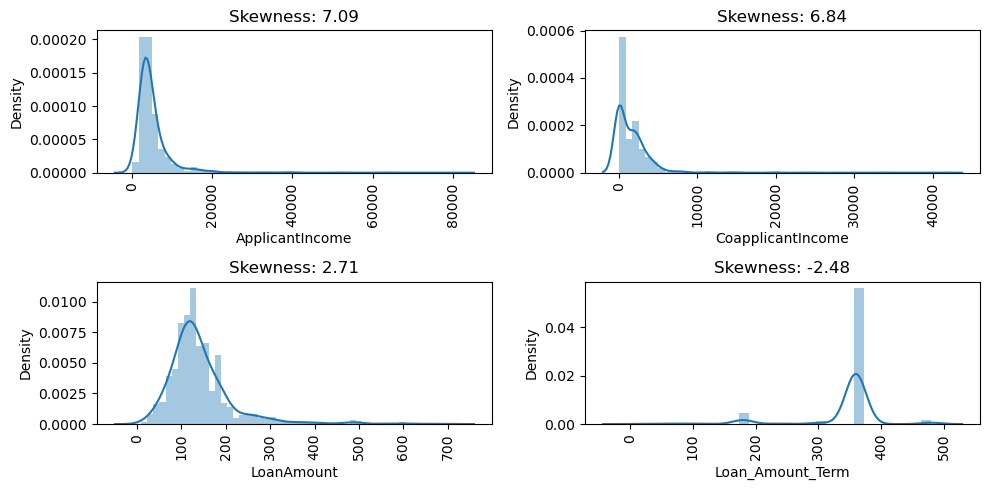

In [20]:
nrows=2
ncols=2
rep=1
plt.figure(figsize=(10,5))
for i in num_cols:
    plt.subplot(nrows,ncols,rep)
    sns.distplot(combine[i])
    plt.title('Skewness: %.2f'%combine[i].skew())
    plt.xticks(rotation=90)
    rep=rep+1
plt.tight_layout()
plt.show()

#### Observation:-
* Applicantincome shows highly positive skewed distributions and most of the applicant are in the income range of 0 to 20000
* CoapplicantIncome also shows a highly positive skewed distributions  and most of the coapplicant income are in the range of 0
to 10000
* LoanAmount is also show a skewed distributions with most of the loan amount are varies in 100 to 200 thousands
* Loan_Amount_Term is negatively skewed and most of the loan term are lie in the term range of 300 to 400 months

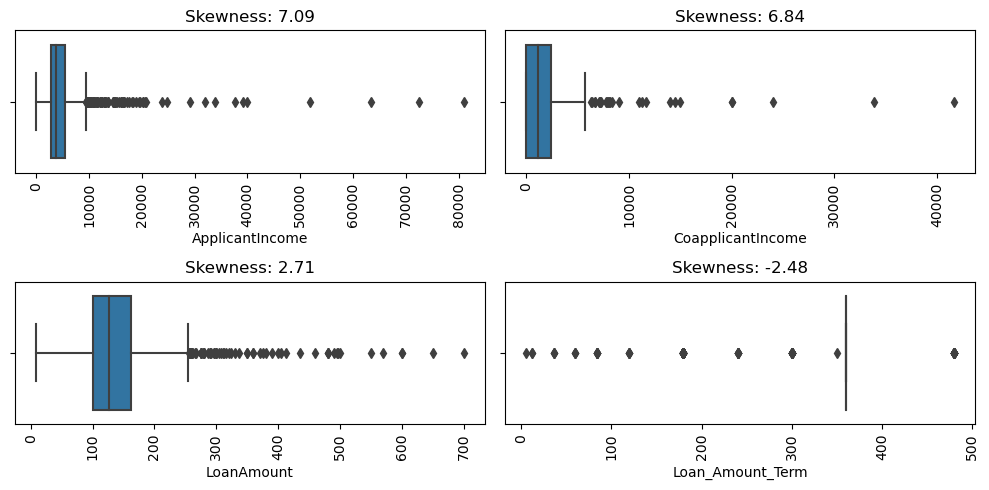

In [21]:
nrows=2
ncols=2
rep=1
plt.figure(figsize=(10,5))
for i in num_cols:
    plt.subplot(nrows,ncols,rep)
    sns.boxplot(combine[i])
    plt.title('Skewness: %.2f'%combine[i].skew())
    plt.xticks(rotation=90)
    rep=rep+1
plt.tight_layout()
plt.show()

#### Categorical Columns

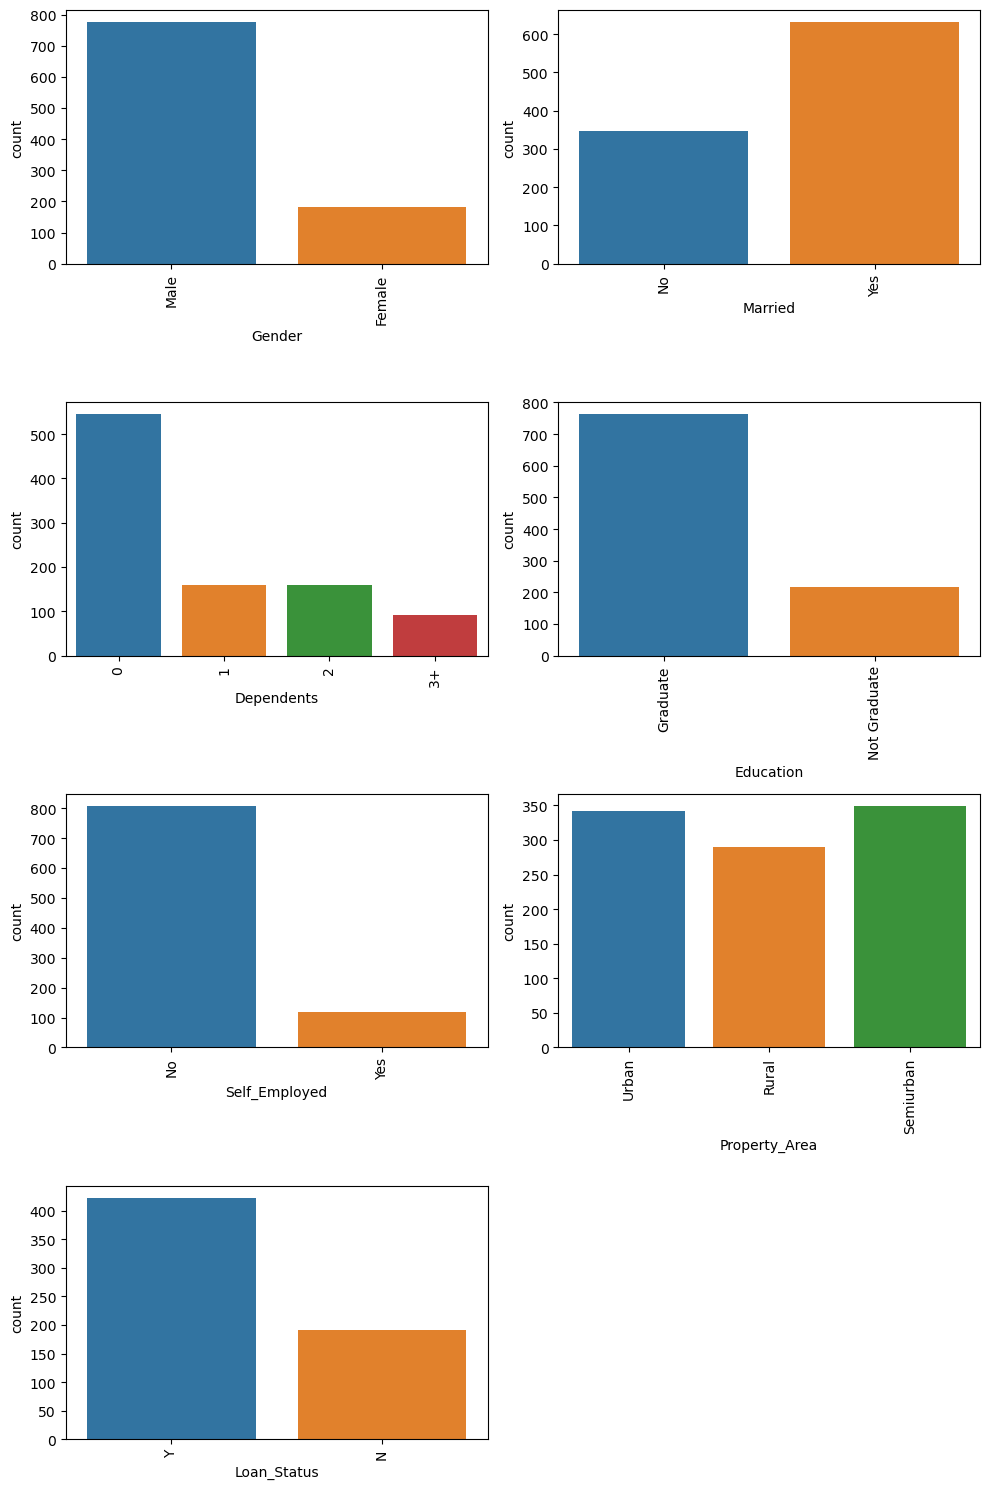

In [22]:
nrows=4
ncols=2
rep=1
plt.figure(figsize=(10,15))
for i in cat_cols:
    plt.subplot(nrows,ncols,rep)
    sns.countplot(combine[i])
    plt.xticks(rotation=90)
    rep=rep+1
plt.tight_layout()
plt.show()

#### Observation
* Most of the applicants are Male
* Most of the applicants are Married.
* Most of the applicants are 0 dependents
* Most of the applicants are Graduate
* Most of the applicants are Not self employed
* Most of the applicants belongs to Semi urban areas
* In Train Most of the applicants loan has been approved

### `Bi-Variate Analysis`

##### Numeric Vs Target

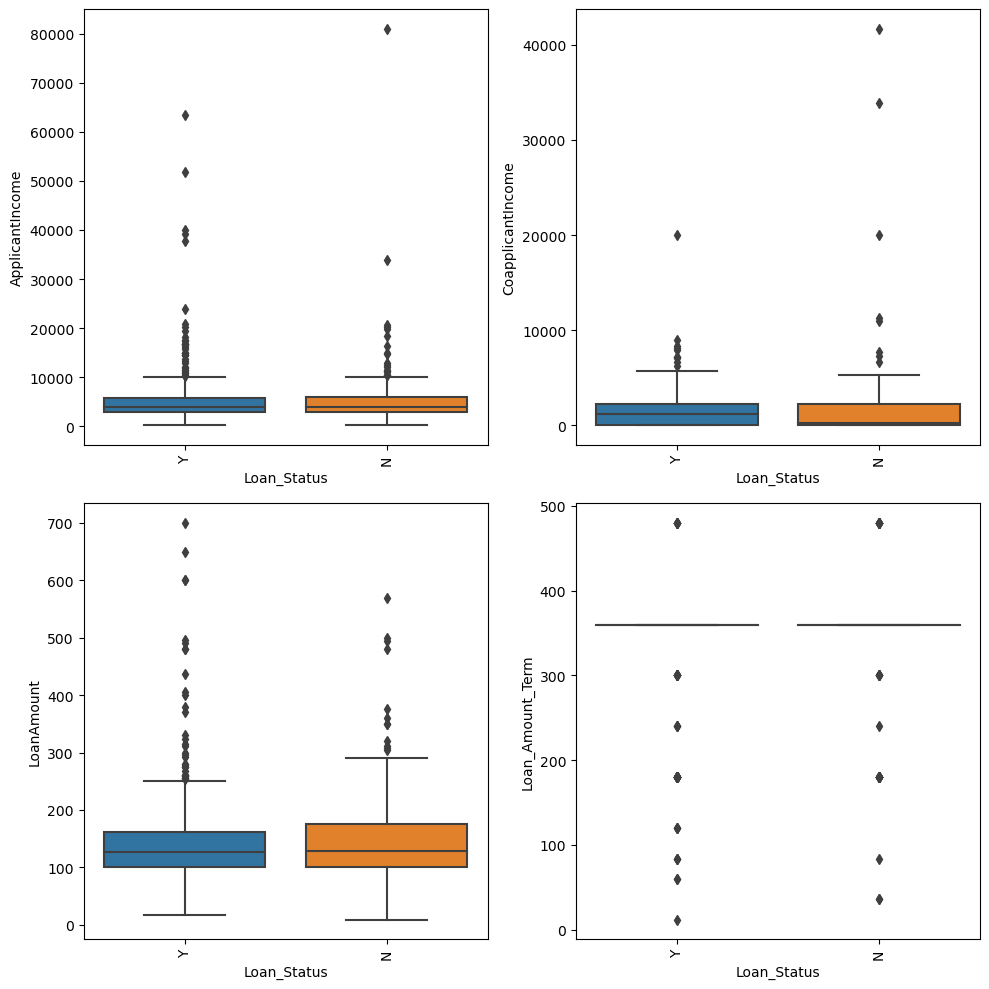

In [23]:
nrows=2
ncols=2
rep=1
plt.figure(figsize=(10,10))
for i in num_cols:
    plt.subplot(nrows,ncols,rep)
    sns.boxplot(combine.Loan_Status,combine[i])
    plt.xticks(rotation=90)
    rep=rep+1
plt.tight_layout()
plt.show()

#### Observation:-
* 

#### Categoric Vs Target

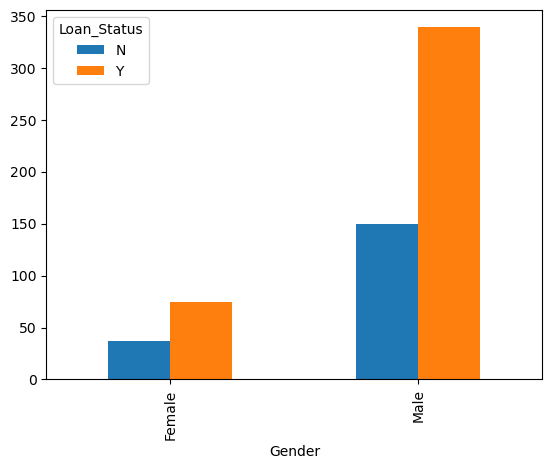

In [24]:
pd.crosstab(combine.Gender,combine.Loan_Status).plot(kind='bar')
plt.show()

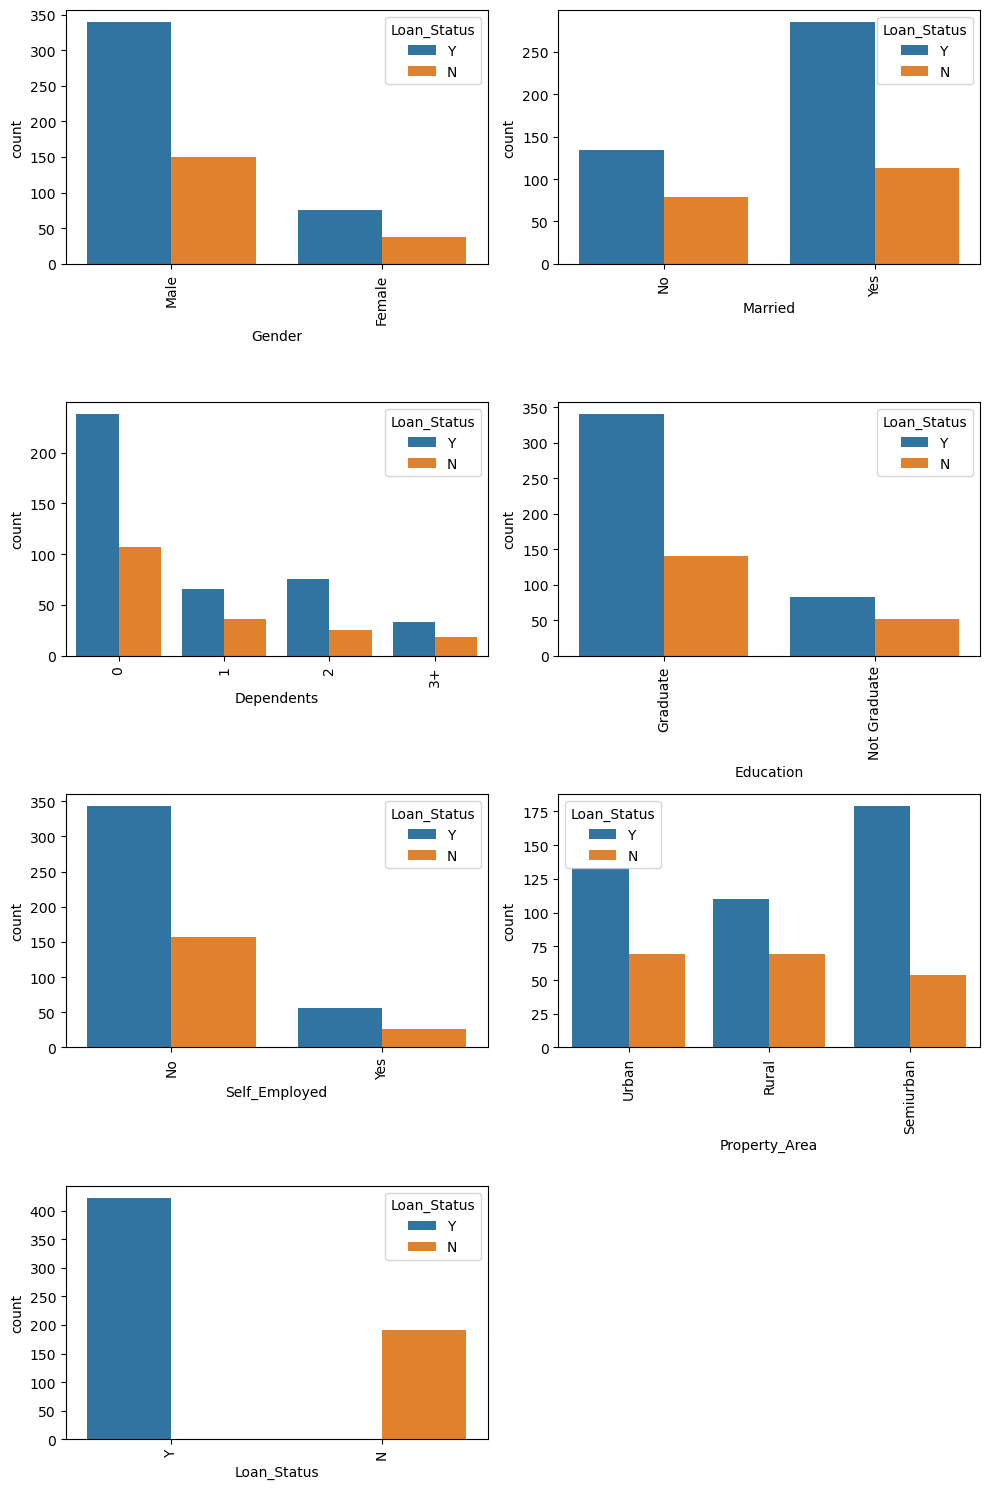

In [25]:

nrows=4
ncols=2
rep=1
plt.figure(figsize=(10,15))
for i in cat_cols:
    plt.subplot(nrows,ncols,rep)
    sns.countplot(combine[i],hue=combine.Loan_Status)
    plt.xticks(rotation=90)
    rep=rep+1
plt.tight_layout()
plt.show()

#### Obseravation:-
* Male are the high proportion of loan approved status
* Married person are high proportion of loan approved status
* Most of the applicant whoes loan has approved have zero dependants
* Graduate applicant are high proportion of loan approved status
* 

#### Lets Perform Statistical Test

* **Numeric Vs Target**

In [26]:
# Ho: The featutre has not any significant relation with Target

# Ha: The Feature has significant relation with Target

for i in num_cols:
    sample1=combine.groupby(['Loan_Status'])[i].apply(list)[0]
    sample2=combine.groupby(['Loan_Status'])[i].apply(list)[1]
    ttest,p_value=stats.ttest_ind(sample1,sample2)
    print('P_value of %s'%i,'--------',p_value)
# ApplicantIncome,CoapplicantIncome has not any siginificant relation with Loan_Status.P_value of Loan amount and Loan amount Term
# comes out to be 'nan' because it contains missing value,however i will perform the statistical test after dealing with missing value
# later

P_value of ApplicantIncome -------- 0.907287812130518
P_value of CoapplicantIncome -------- 0.14294828684286368
P_value of LoanAmount -------- nan
P_value of Loan_Amount_Term -------- nan


* **Categoric vs Target**

In [27]:
# Ho: There is not significant association of two variables
# Ha: There is signifincat association of two variables
for i in cat_cols:
    tbl=pd.crosstab(combine[i],combine.Loan_Status)
    test_stats,p_value,dof,exp_value=stats.chi2_contingency(tbl)
    print('P_value of %s'%i,'--------',p_value)
# The features like Married,Education,Property_Area has significant relation with the Target

P_value of Gender -------- 0.7086529816451106
P_value of Married -------- 0.03439381301579988
P_value of Dependents -------- 0.3678506740863211
P_value of Education -------- 0.04309962129357355
P_value of Self_Employed -------- 1.0
P_value of Property_Area -------- 0.0021360187811644937
P_value of Loan_Status -------- 1.544676456058992e-134


### Missing Value

In [28]:
combine.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [29]:
combine[combine.Gender.isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,LP002478,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
467,LP002501,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,LP002625,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N


In [30]:
combine.Gender=combine.Gender.fillna(value=combine.Gender.mode()[0])
# Fill Missing value of gender with Mode

In [31]:
combine[combine.Married.isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [32]:
combine.groupby(['Gender'])['Married'].value_counts()

Gender  Married
Female  No         124
        Yes         57
Male    Yes        574
        No         223
Name: Married, dtype: int64

In [33]:
combine.Married=combine.Married.fillna(value=combine.Married.mode()[0])
# filling Missing value of Married with Mode

In [34]:
combine.Dependents.mode()

0    0
Name: Dependents, dtype: object

In [35]:
combine.Dependents=combine.Dependents.fillna(value=combine.Dependents.mode()[0])

In [36]:
combine.Self_Employed=combine.Self_Employed.fillna(value=combine.Self_Employed.mode()[0])

In [37]:
combine.LoanAmount=combine.LoanAmount.fillna(value=combine.LoanAmount.median())
# filling Loan Amount Term with Median value as its contain some outliers so

In [38]:
combine.Loan_Amount_Term.median()

360.0

In [39]:
combine.Loan_Amount_Term=combine.Loan_Amount_Term.fillna(value=combine.Loan_Amount_Term.median())
# Also Loan Term having outliers in it so i impute the Nan value with its Median value

In [40]:
combine.Credit_History.median()

1.0

In [41]:
combine.groupby(['Loan_Status'])['Credit_History'].median()

Loan_Status
N    1.0
Y    1.0
Name: Credit_History, dtype: float64

In [42]:
combine.Credit_History=combine.Credit_History.fillna(value=combine.Credit_History.median())

In [43]:
combine.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64

### Feature Engineering

In [44]:
combine.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,126.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [45]:
combine['Magic_1']=combine.groupby(['Gender','Married','Dependents'])['Loan_ID'].transform('nunique')

In [46]:
sample_1=combine.groupby(['Loan_Status'])['Magic_1'].apply(list)[0]
sample_2=combine.groupby(['Loan_Status'])['Magic_1'].apply(list)[1]

In [47]:
stats.ttest_ind(sample_1,sample_2)
# This feature has not significant statistically with the target

Ttest_indResult(statistic=-1.062709774172943, pvalue=0.28833273844037455)

In [48]:
combine.drop(columns=['Magic_1'],inplace=True)

### Transformation

In [49]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
for i in num_cols:
    combine[i]=pt.fit_transform(pd.DataFrame(combine[i]))

In [50]:
combine.skew()

ApplicantIncome      0.373338
CoapplicantIncome   -0.166520
LoanAmount           0.021232
Loan_Amount_Term     0.365363
Credit_History      -1.953899
dtype: float64

In [51]:
combine.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,9.810000e+02,9.810000e+02,9.810000e+02,9.810000e+02,981.000000
mean,3.940669e-16,-2.897218e-17,1.339963e-16,7.460337e-16,0.849134
std,1.000510e+00,1.000510e+00,1.000510e+00,1.000510e+00,0.358101
min,-7.183683e+00,-1.117699e+00,-5.151248e+00,-2.704378e+00,0.000000
25%,-5.487029e-01,-1.117699e+00,-5.062968e-01,1.759757e-01,1.000000
50%,-1.466328e-01,6.409435e-01,-3.531546e-02,1.759757e-01,1.000000
75%,4.168687e-01,8.854245e-01,4.810069e-01,1.759757e-01,1.000000
max,5.534979e+00,1.936149e+00,3.843394e+00,4.165465e+00,1.000000


### Encoding

In [52]:
# Lets apply one hot encoding as must of the variables does not contain much number of unique features
new_data=combine.drop(columns=['Loan_ID'])

In [53]:
new_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,0.508348,-1.117699,-0.035315,0.175976,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,0.132815,0.738459,-0.001520,0.175976,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,-0.488419,-1.117699,-1.393004,0.175976,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,-0.698749,0.884442,-0.139801,0.175976,1.0,Urban,Y
4,Male,No,0,Graduate,No,0.548373,-1.117699,0.206810,0.175976,1.0,Urban,Y


In [54]:
new_data.Loan_Status=new_data.Loan_Status.map({'Y':1,'N':0})

In [55]:
new_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,0.508348,-1.117699,-0.035315,0.175976,1.0,Urban,1.0
1,Male,Yes,1,Graduate,No,0.132815,0.738459,-0.001520,0.175976,1.0,Rural,0.0
2,Male,Yes,0,Graduate,Yes,-0.488419,-1.117699,-1.393004,0.175976,1.0,Urban,1.0
3,Male,Yes,0,Not Graduate,No,-0.698749,0.884442,-0.139801,0.175976,1.0,Urban,1.0
4,Male,No,0,Graduate,No,0.548373,-1.117699,0.206810,0.175976,1.0,Urban,1.0


In [56]:
new_data=pd.get_dummies(new_data,drop_first=True)

In [57]:
new_data.shape

(981, 15)

In [58]:
new_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0.508348,-1.117699,-0.035315,0.175976,1.0,1.0,1,0,0,0,0,0,0,0,1
1,0.132815,0.738459,-0.001520,0.175976,1.0,0.0,1,1,1,0,0,0,0,0,0
2,-0.488419,-1.117699,-1.393004,0.175976,1.0,1.0,1,1,0,0,0,0,1,0,1
3,-0.698749,0.884442,-0.139801,0.175976,1.0,1.0,1,1,0,0,0,1,0,0,1
4,0.548373,-1.117699,0.206810,0.175976,1.0,1.0,1,0,0,0,0,0,0,0,1


In [59]:
new_train=new_data.loc[:train.shape[0]-1]
new_test=new_data.loc[train.shape[0]:]

In [60]:
new_test=new_test.drop(columns=['Loan_Status'])

In [61]:
train.shape

(614, 13)

In [62]:
test.shape

(367, 12)

In [63]:
new_train.shape

(614, 15)

In [64]:
new_test.shape

(367, 14)

In [65]:
X=new_train.drop(columns=['Loan_Status'])
y=new_train.Loan_Status

In [66]:
#Lets split the data into Train and Test

In [67]:
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

In [68]:
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((429, 14), (429,), (185, 14), (185,))

In [69]:
# Base Logit Model
import statsmodels.api as sma
from statsmodels.api import OLS
xtrain_c=sma.add_constant(xtrain)
xtest_c=sma.add_constant(xtest)

In [70]:
model_logit=OLS(ytrain,xtrain_c).fit()
model_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Loan_Status   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     11.88
Date:                Tue, 04 Apr 2023   Prob (F-statistic):           3.09e-23
Time:                        20:27:24   Log-Likelihood:                -206.34
No. Observations:                 429   AIC:                             442.7
Df Residuals:                     414   BIC:                             503.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0291      0.078      0.372      0.710      -0.125       0.183
ApplicantIncome             0.0243      0.028      0.868      0.386      -0.031       0.079
CoapplicantIncome           0.0365      0.024      1.496      0.135      -0.011       0.085
LoanAmount                 -0.0188      0.024     -0.786      0.432      -0.066       0.028
Loan_Amount_Term           -0.0118      0.020     -0.578      0.564      -0.052       0.028
Credit_History              0.6667      0.058     11.400      0.000       0.552       0.782
Gender_Male                -0.0277      0.057     -0.486      0.627      -0.140       0.084
Married_Yes                 0.0766      0.049      1.568      0.118      -0.019       0.173
Dependents_1               -0.0637      0.055     -1.166      0.244      -0.171       0.044
Dependents_2                0.0827      0.058      1.416      0.158      -0.032       0.197
Dependents_3+               0.0588      0.075      0.787      0.432      -0.088       0.206
Education_Not Graduate     -0.0779      0.049     -1.601      0.110      -0.174       0.018
Self_Employed_Yes          -0.0246      0.058     -0.422      0.673      -0.139       0.090
Property_Area_Semiurban     0.1334      0.048      2.783      0.006       0.039       0.228
Property_Area_Urban         0.0383      0.049      0.779      0.436      -0.058       0.135
==============================================================================
Omnibus:                       58.640   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.515
Skew:                          -1.068   Prob(JB):                     1.99e-18
Kurtosis:                       3.004   Cond. No.                         9.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
y_pred_logit=np.where(model_logit.predict(xtest_c)>0.5,1,0)

In [72]:
y_pred_logit

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1])

In [73]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report,precision_score,recall_score,roc_auc_score,roc_curve

In [74]:
print('Accuracy:',accuracy_score(ytest,y_pred_logit))
print('classificantion report:\n',classification_report(ytest,y_pred_logit))

Accuracy: 0.8486486486486486
classificantion report:
               precision    recall  f1-score   support

         0.0       0.94      0.55      0.70        58
         1.0       0.83      0.98      0.90       127

    accuracy                           0.85       185
   macro avg       0.88      0.77      0.80       185
weighted avg       0.86      0.85      0.84       185



##### Lets apply diffrent algorithms

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,StackingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

In [76]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [80]:
def base_models():
    models=dict()
    models['log_r']=LogisticRegression()
    models['rf']=RandomForestClassifier(criterion='entropy')
    models['ada']=AdaBoostClassifier()
    models['gbm']=GradientBoostingClassifier()
    models['xgb']=XGBClassifier()
    models['lgbm']=LGBMClassifier()
    models['catboost']=CatBoostClassifier()
    models['naive']=GaussianNB()
    models['dt']=DecisionTreeClassifier()
    return models

In [83]:
# Evalution Function
def eval_score(model):
    cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
    score=cross_val_score(model,X,y,scoring='accuracy',cv=cv,error_score='raise',n_jobs=-1)
    return score

In [84]:
models=base_models()
result,names=list(),list()
for name,model in models.items():
    finalscore=eval_score(model)
    result.append(finalscore)
    names.append(name)
    print('Model:',names[-1],'Mean_Score:',np.mean(result),'Variance:',np.std(result))

Model: log_r Mean_Score: 0.7997067839530854 Variance: 0.01716518356803636
Model: rf Mean_Score: 0.7915567106490737 Variance: 0.023126531198386688
Model: ada Mean_Score: 0.7915500466480074 Variance: 0.021190587336277697
Model: gbm Mean_Score: 0.787485005997601 Variance: 0.022465937923306572
Model: xgb Mean_Score: 0.7801439424230306 Variance: 0.028758275154307587
Model: lgbm Mean_Score: 0.7758007907947932 Variance: 0.03244870087292312
Model: catboost Mean_Score: 0.7778164924506388 Variance: 0.03214952331105177
Model: naive Mean_Score: 0.7805544448887112 Variance: 0.03339876404258026
Model: dt Mean_Score: 0.7721829786603877 Variance: 0.04130437551608767


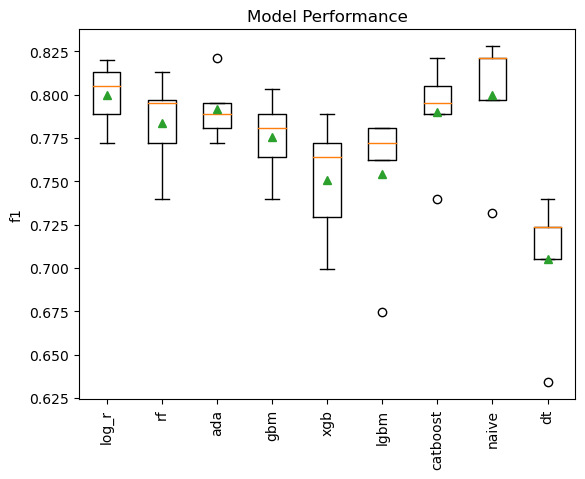

In [85]:
plt.boxplot(result,labels=names,showmeans=True)
plt.xticks(rotation=90)
plt.ylabel('f1')
plt.title('Model Performance')
plt.show()

In [86]:
lr=LogisticRegression()
model_lr=lr.fit(X,y)

In [87]:
y_pred_lr=model_lr.predict(new_test)

In [88]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [89]:
submission['Loan_Status']=y_pred_lr

In [90]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,1.0
1,LP001022,1.0
2,LP001031,1.0
3,LP001035,1.0
4,LP001051,1.0


In [91]:
submission.Loan_Status=submission.Loan_Status.map({1:'Y',0:'N'})

In [92]:
submission.to_csv('Loan_log_model.csv',index=False)#0.7777777778

In [93]:
cd

C:\Users\ASUS


##### Lets fit the Ada boost model and check the score

In [94]:
ada=AdaBoostClassifier(random_state=42)

In [95]:
ada.fit(X,y)

AdaBoostClassifier(random_state=42)

In [97]:
y_pred_ada=ada.predict(new_test)

In [99]:
submission=pd.read_csv(r"C:\Users\ASUS\Downloads\sample_submission_49d68Cx.csv")

In [100]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [101]:
submission['Loan_Status']=y_pred_ada

In [102]:
submission.Loan_Status=submission.Loan_Status.map({1:'Y',0:'N'})

In [103]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [106]:
submission.to_csv('Loan_pred_Adaboost.csv',index=False) #0.7569444444444444

##### Lets fit the Naive Bayes model and check the score

In [107]:
naive=GaussianNB()

In [108]:
naive.fit(X,y)

GaussianNB()

In [110]:
y_pred_naive=naive.predict(new_test)

In [111]:
submission=pd.read_csv(r"C:\Users\ASUS\Downloads\sample_submission_49d68Cx.csv")

In [112]:
submission.Loan_Status=y_pred_naive

In [113]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,1.0
1,LP001022,1.0
2,LP001031,1.0
3,LP001035,1.0
4,LP001051,1.0


In [114]:
submission.Loan_Status=submission.Loan_Status.map({1:'Y',0:'N'})

In [115]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [117]:
submission.to_csv('Loan_pred_naivebase.csv',index=False) #0.7777777777777778.

#### Lets Apply Smote Technique

In [118]:
from imblearn.over_sampling import SMOTE

In [119]:
smote=SMOTE()

In [122]:
smote_x,smote_y=smote.fit_resample(X,y)

In [125]:
smote_y.value_counts()

1.0    422
0.0    422
Name: Loan_Status, dtype: int64

In [126]:
def base_models():
    models=dict()
    models['log_r']=LogisticRegression()
    models['rf']=RandomForestClassifier(criterion='entropy')
    models['ada']=AdaBoostClassifier()
    models['gbm']=GradientBoostingClassifier()
    models['xgb']=XGBClassifier()
    models['lgbm']=LGBMClassifier()
    models['catboost']=CatBoostClassifier()
    models['naive']=GaussianNB()
    models['dt']=DecisionTreeClassifier()
    return models

In [128]:
# Evalution Function
def eval_score(model):
    cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
    score=cross_val_score(model,smote_x,smote_y,scoring='accuracy',cv=cv,error_score='raise',n_jobs=-1)
    return score

In [129]:
models=base_models()
result,names=list(),list()
for name,model in models.items():
    finalscore=eval_score(model)
    result.append(finalscore)
    names.append(name)
    print('Model:',names[-1],'Mean_Score:',np.mean(result),'Variance:',np.std(result))

Model: log_r Mean_Score: 0.7642152719075797 Variance: 0.03843336151028457
Model: rf Mean_Score: 0.791476472245703 Variance: 0.04256876448811923
Model: ada Mean_Score: 0.7776415891800507 Variance: 0.04434569208272566
Model: gbm Mean_Score: 0.7757660608622147 Variance: 0.04098374015127758
Model: xgb Mean_Score: 0.7789095519864749 Variance: 0.03845058737020167
Model: lgbm Mean_Score: 0.7808079740772045 Variance: 0.0360149912848447
Model: catboost Mean_Score: 0.7867336875578633 Variance: 0.037998248117016624
Model: naive Mean_Score: 0.7815529022259792 Variance: 0.03936325475292018
Model: dt Mean_Score: 0.7758108700416394 Variance: 0.041327020519900594


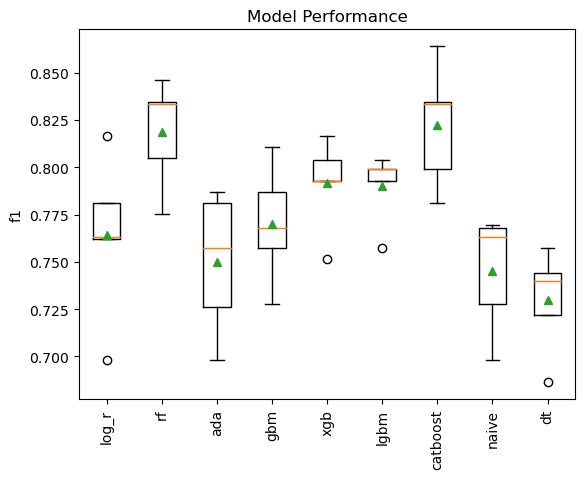

In [130]:
plt.boxplot(result,labels=names,showmeans=True)
plt.xticks(rotation=90)
plt.ylabel('f1')
plt.title('Model Performance')
plt.show()

In [131]:
# Lets apply Random Forest
rf=RandomForestClassifier(random_state=42)

In [132]:
rf.fit(smote_x,smote_y)

RandomForestClassifier(random_state=42)

In [134]:
y_pred_rf=rf.predict(new_test)

In [135]:
submission=pd.read_csv(r"C:\Users\ASUS\Downloads\sample_submission_49d68Cx.csv")
submission.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [136]:
submission.Loan_Status=y_pred_rf

In [137]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,1.0
1,LP001022,1.0
2,LP001031,1.0
3,LP001035,1.0
4,LP001051,0.0


In [138]:
submission.Loan_Status=submission.Loan_Status.map({1:'Y',0:'N'})

In [139]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,N


In [141]:
submission.to_csv('Loan_pred_rf_smote.csv',index=False) #0.7361111111111112.

* **As i can see there is not much any diffrence in accuracy after applying smote technique in the data**

### Lets apply Stacking classifier

In [142]:
base=[('log_r',LogisticRegression()),('ada',AdaBoostClassifier())]
final=[('catboost',CatBoostClassifier())]

In [143]:

Cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

In [144]:
stack=StackingClassifier(estimators=base,final_estimator=CatBoostClassifier(),cv=Cv) 

In [145]:
stack.fit(X,y)

Learning rate set to 0.008365
0:	learn: 0.6887092	total: 143ms	remaining: 2m 22s
1:	learn: 0.6845386	total: 145ms	remaining: 1m 12s
2:	learn: 0.6805550	total: 148ms	remaining: 49s
3:	learn: 0.6765624	total: 149ms	remaining: 37.2s
4:	learn: 0.6732009	total: 151ms	remaining: 30.1s
5:	learn: 0.6691948	total: 153ms	remaining: 25.4s
6:	learn: 0.6656763	total: 155ms	remaining: 22s
7:	learn: 0.6621054	total: 157ms	remaining: 19.5s
8:	learn: 0.6584387	total: 159ms	remaining: 17.5s
9:	learn: 0.6549864	total: 161ms	remaining: 15.9s
10:	learn: 0.6516299	total: 163ms	remaining: 14.6s
11:	learn: 0.6481309	total: 165ms	remaining: 13.6s
12:	learn: 0.6448841	total: 167ms	remaining: 12.7s
13:	learn: 0.6417221	total: 169ms	remaining: 11.9s
14:	learn: 0.6383287	total: 170ms	remaining: 11.2s
15:	learn: 0.6351944	total: 172ms	remaining: 10.6s
16:	learn: 0.6319263	total: 174ms	remaining: 10.1s
17:	learn: 0.6290356	total: 176ms	remaining: 9.62s
18:	learn: 0.6259881	total: 178ms	remaining: 9.2s
19:	learn: 0.6

250:	learn: 0.4458557	total: 577ms	remaining: 1.72s
251:	learn: 0.4457090	total: 579ms	remaining: 1.72s
252:	learn: 0.4455992	total: 580ms	remaining: 1.71s
253:	learn: 0.4454680	total: 582ms	remaining: 1.71s
254:	learn: 0.4453404	total: 584ms	remaining: 1.71s
255:	learn: 0.4452406	total: 585ms	remaining: 1.7s
256:	learn: 0.4451063	total: 587ms	remaining: 1.7s
257:	learn: 0.4449675	total: 588ms	remaining: 1.69s
258:	learn: 0.4448630	total: 590ms	remaining: 1.69s
259:	learn: 0.4447014	total: 591ms	remaining: 1.68s
260:	learn: 0.4444055	total: 593ms	remaining: 1.68s
261:	learn: 0.4443039	total: 595ms	remaining: 1.68s
262:	learn: 0.4441784	total: 596ms	remaining: 1.67s
263:	learn: 0.4440100	total: 598ms	remaining: 1.67s
264:	learn: 0.4438539	total: 600ms	remaining: 1.66s
265:	learn: 0.4436212	total: 602ms	remaining: 1.66s
266:	learn: 0.4434630	total: 604ms	remaining: 1.66s
267:	learn: 0.4433631	total: 607ms	remaining: 1.66s
268:	learn: 0.4432405	total: 609ms	remaining: 1.66s
269:	learn: 0.

488:	learn: 0.4169298	total: 954ms	remaining: 997ms
489:	learn: 0.4167644	total: 956ms	remaining: 995ms
490:	learn: 0.4166657	total: 957ms	remaining: 993ms
491:	learn: 0.4165742	total: 959ms	remaining: 990ms
492:	learn: 0.4165125	total: 960ms	remaining: 988ms
493:	learn: 0.4164282	total: 962ms	remaining: 985ms
494:	learn: 0.4163590	total: 964ms	remaining: 983ms
495:	learn: 0.4163422	total: 965ms	remaining: 981ms
496:	learn: 0.4162335	total: 967ms	remaining: 978ms
497:	learn: 0.4161359	total: 968ms	remaining: 976ms
498:	learn: 0.4160423	total: 970ms	remaining: 974ms
499:	learn: 0.4159671	total: 972ms	remaining: 972ms
500:	learn: 0.4158642	total: 974ms	remaining: 970ms
501:	learn: 0.4156819	total: 976ms	remaining: 968ms
502:	learn: 0.4155776	total: 977ms	remaining: 966ms
503:	learn: 0.4155145	total: 979ms	remaining: 963ms
504:	learn: 0.4153154	total: 980ms	remaining: 961ms
505:	learn: 0.4152218	total: 982ms	remaining: 958ms
506:	learn: 0.4151369	total: 983ms	remaining: 956ms
507:	learn: 

739:	learn: 0.3910336	total: 1.35s	remaining: 474ms
740:	learn: 0.3908705	total: 1.35s	remaining: 472ms
741:	learn: 0.3907521	total: 1.35s	remaining: 470ms
742:	learn: 0.3906887	total: 1.35s	remaining: 469ms
743:	learn: 0.3905085	total: 1.36s	remaining: 467ms
744:	learn: 0.3904443	total: 1.36s	remaining: 465ms
745:	learn: 0.3903452	total: 1.36s	remaining: 463ms
746:	learn: 0.3902521	total: 1.36s	remaining: 461ms
747:	learn: 0.3901536	total: 1.36s	remaining: 459ms
748:	learn: 0.3900753	total: 1.36s	remaining: 458ms
749:	learn: 0.3899682	total: 1.37s	remaining: 456ms
750:	learn: 0.3898047	total: 1.37s	remaining: 454ms
751:	learn: 0.3896443	total: 1.37s	remaining: 452ms
752:	learn: 0.3895451	total: 1.37s	remaining: 451ms
753:	learn: 0.3894346	total: 1.37s	remaining: 449ms
754:	learn: 0.3892558	total: 1.38s	remaining: 447ms
755:	learn: 0.3891198	total: 1.38s	remaining: 445ms
756:	learn: 0.3889519	total: 1.38s	remaining: 443ms
757:	learn: 0.3888265	total: 1.38s	remaining: 441ms
758:	learn: 

956:	learn: 0.3669800	total: 1.72s	remaining: 77.3ms
957:	learn: 0.3667585	total: 1.72s	remaining: 75.5ms
958:	learn: 0.3666432	total: 1.72s	remaining: 73.7ms
959:	learn: 0.3665317	total: 1.73s	remaining: 71.9ms
960:	learn: 0.3663626	total: 1.73s	remaining: 70.1ms
961:	learn: 0.3662688	total: 1.73s	remaining: 68.3ms
962:	learn: 0.3661135	total: 1.73s	remaining: 66.5ms
963:	learn: 0.3660472	total: 1.73s	remaining: 64.6ms
964:	learn: 0.3660228	total: 1.73s	remaining: 62.8ms
965:	learn: 0.3660034	total: 1.73s	remaining: 61ms
966:	learn: 0.3659151	total: 1.74s	remaining: 59.3ms
967:	learn: 0.3657813	total: 1.74s	remaining: 57.4ms
968:	learn: 0.3655187	total: 1.74s	remaining: 55.6ms
969:	learn: 0.3654146	total: 1.74s	remaining: 53.8ms
970:	learn: 0.3651610	total: 1.74s	remaining: 52ms
971:	learn: 0.3650487	total: 1.74s	remaining: 50.2ms
972:	learn: 0.3649756	total: 1.75s	remaining: 48.4ms
973:	learn: 0.3647612	total: 1.75s	remaining: 46.6ms
974:	learn: 0.3645759	total: 1.75s	remaining: 44.8

StackingClassifier(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimators=[('log_r', LogisticRegression()),
                               ('ada', AdaBoostClassifier())],
                   final_estimator=<catboost.core.CatBoostClassifier object at 0x000002033A37D6D0>)

In [146]:
y_pred_stack=stack.predict(new_test)

In [147]:
submission=pd.read_csv(r"C:\Users\ASUS\Downloads\sample_submission_49d68Cx.csv")
submission.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [148]:
submission.Loan_Status=y_pred_stack

In [149]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,1.0
1,LP001022,1.0
2,LP001031,1.0
3,LP001035,1.0
4,LP001051,1.0


In [150]:
submission.Loan_Status=submission.Loan_Status.map({1:'Y',0:'N'})

In [151]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [154]:
submission.to_csv('Loan_prediction_Stack.csv',index=False) #0.75

#### End Note:
* In this problem i got my highest accuracy through logistic regression model,so i will choose this model as my final model
* I have skipped the Feature Engineering part in this,One can try to feature engineering to improve the accuracy of the model
further
* In this dataset/problem smote will not able to create any impact on accuracy